In [23]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## SABR Model
### Black Calibration Space

In [150]:
import numpy as np
from scipy.optimize import minimize

def B_sabr(alpha, beta, rho, nu, F, K, T):
    """
    Calculate the implied volatility using the SABR model.

    Parameters:
    - alpha: SABR parameter alpha (initial volatility)
    - beta: SABR parameter beta (elasticity)
    - rho: SABR parameter rho (correlation between Brownian motions)
    - nu: SABR parameter nu (volatility of volatility)
    - F: Forward price or spot price
    - K: Strike price
    - T: Time to maturity

    Returns:
    - implied_vol: Implied volatility
    """
    
    #Calculate implied volatility using Hegan approximation
    X = np.log(F / K)
    Z = (nu / alpha) * (F ** ((1 - beta) / 2)) * X
    chi = np.log((np.sqrt(1 - 2 * rho * Z + Z**2) + Z - rho) / (1 - rho))
    
    
    
    #At the Money 
    if F == K:
        
        implied_vol = alpha / F ** (1 - beta) * (1 + ((1 - beta) ** 2 / 24 * alpha ** 2 / F ** (2 - 2 * beta) + 0.25 * rho * beta * alpha * nu / (F * (1-beta)) + (2-3*rho**2) / 24 * nu**2) * T)
        return implied_vol
    
    factor1 = alpha / ((F*K)**((1-beta)/2)*(1 + (1-beta)**2/24* X **2 + (1-beta)**4/1920*X**4))
    factor2 = 1 + ((1 - beta)**2 / 24 * (alpha**2 / ((F*K)** (1 - beta))) +
                   (rho * beta * nu * alpha) / (4 * ((F*K) ** ((1 - beta) / 2))) +
                   ((nu ** 2) * (2 - 3 * (rho ** 2)) / 24)) * T
    
    implied_vol = factor1 * Z / chi *factor2
    
    return implied_vol

def objective_function(params, market_data):
    """
    Objective function to minimize the difference between market and model implied volatilities.

    Parameters:
    - params: SABR parameters (alpha, beta, rho, nu)
    - market_data: List of tuples (F, K, T, market_vol)

    Returns:
    - loss: Sum of squared differences between market and model implied volatilities
    """
    alpha, beta, rho, nu = params
    loss = 0

    for F, K, T, market_vol in market_data:
        model_vol = B_sabr(alpha, beta, rho, nu, F, K, T)
        loss += (model_vol - market_vol) ** 2

    return loss

# Example usage:
market_data = [
    (100, 70, 1, 0.22),
    (100, 80, 1, 0.17),
    (100, 90, 1, 0.14),
    (100, 100, 1, 0.12),
    (100, 110, 1, 0.10),
    (100, 120, 1, 0.13),
    (100, 130, 1, 0.16),
    (100, 140, 1, 0.20),
    # Add more market data points as needed
]

initial_guess = [0.2, 0.5, 0, 0.2]  # Initial guess for SABR parameters
result = minimize(objective_function, initial_guess, args=(market_data,))
optimal_params = result.x

print("Optimal SABR Parameters:", optimal_params)


Optimal SABR Parameters: [ 0.10385496  0.98627625 -0.19737283  1.15274409]


In [151]:
vol_list_B=[]
for i in range(10,200,10):
    vol_list_B.append(B_sabr(optimal_params[0],optimal_params[1],optimal_params[2],optimal_params[3],100, i, 1))



## Normal Calibration Space

In [166]:
def N_sabr(alpha, beta, rho, nu, F, K, T):
    """
    Calculate the implied volatility using the SABR model.

    Parameters:
    - alpha: SABR parameter alpha (initial volatility)
    - beta: SABR parameter beta (elasticity)
    - rho: SABR parameter rho (correlation between Brownian motions)
    - nu: SABR parameter nu (volatility of volatility)
    - F: Forward price or spot price
    - K: Strike price
    - T: Time to maturity

    Returns:
    - implied_vol: Implied volatility
    """
    
    #Calculate implied volatility using Hegan approximation
    X = np.log(F / K)
    Z = (nu / alpha) * (F ** ((1 - beta) / 2)) * X
    chi = np.log((np.sqrt(1 - 2 * rho * Z + Z**2) + Z - rho) / (1 - rho))
    
    
    
    #At the Money 
    if F == K:
        
        implied_vol = alpha / F ** (1 - beta) * (1 + ((1 - beta) ** 2 / 24 * alpha ** 2 / F ** (2 - 2 * beta) + 0.25 * rho * beta * alpha * nu / (F * (1-beta)) + (2-3*rho**2) / 24 * nu**2) * T)
        return implied_vol
    
    factor1 = (1 + (1-beta)**2 / 24 * X **2 + (1-beta)**4/1920 * X ** 4)
    factor2 = 1 + X**2 / 24 + X ** 4 / 1920 
    factor3 = 1 + ((-beta*(2-beta)*alpha**2) / (24*(F*K)**(1-beta)) + (rho * alpha * nu * beta)/((4*(F *K)**((1-beta)/2)))  + (2 - 3*rho**2)/24 * nu**2)*T
    
    implied_vol = alpha * (F * K) ** (beta/2) * factor2 / factor1 * Z / chi * factor3
    
    return implied_vol 

def objective_function_N(params, market_data):
    """
    Objective function to minimize the difference between market and model implied volatilities.

    Parameters:
    - params: SABR parameters (alpha, beta, rho, nu)
    - market_data: List of tuples (F, K, T, market_vol)

    Returns:
    - loss: Sum of squared differences between market and model implied volatilities
    """
    alpha, beta, rho, nu = params
    loss = 0

    for F, K, T, market_vol in market_data:
        model_vol = N_sabr(alpha, beta, rho, nu, F, K, T)
        loss += (model_vol - market_vol) ** 2

    return loss

# Example usage:
market_data = [
    (100, 70, 1, 0.22),
    (100, 80, 1, 0.17),
    (100, 90, 1, 0.14),
    (100, 100, 1, 0.12),
    (100, 110, 1, 0.10),
    (100, 120, 1, 0.13),
    (100, 130, 1, 0.16),
    (100, 140, 1, 0.20),
    # Add more market data points as needed
]

initial_guess = [0.2, 0.5, 0, 0.2]  # Initial guess for SABR parameters
bounds = ([0, None], [0, 1], [-1, 1], [0, None])
result = minimize(objective_function_N, initial_guess, args=(market_data,), bounds = bounds)
optimal_params_N = result.x

print("Optimal SABR Parameters:", optimal_params_N)



Optimal SABR Parameters: [ 0.00227583  0.81677887 -0.46612112  0.02176505]


In [167]:
vol_list_N=[]
for i in range(10,200,10):
    vol_list_N.append(N_sabr(optimal_params_N[0],optimal_params_N[1],optimal_params_N[2],optimal_params_N[3],100, i, 1))


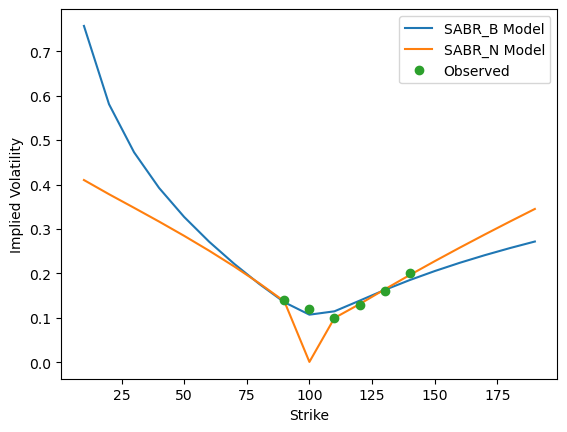

In [168]:
plt.plot(range(10,200,10),vol_list_B,label = 'SABR_B Model')
plt.plot(range(10,200,10),vol_list_N,label = 'SABR_N Model')
plt.plot([90,100,110,120,130,140],[0.14,0.12,0.10,0.13,0.16,0.20],label = 'Observed',linewidth=0, marker='o')
plt.xlabel('Strike')
plt.ylabel('Implied Volatility')
plt.legend()

## Shifted 

[0.7567074077633402, 0.5807152513652132, 0.4725425832588374, 0.39224187444904424, 0.32706739788269507, 0.27122128955217645, 0.22154216134080967, 0.1762368410374251, 0.1352422708341122, 0.10724571056062727, 0.11481518610724965, 0.13867059538708112, 0.16275853155790956, 0.1849758849276079, 0.2052790767375153, 0.22389411087598204, 0.2410552651373508, 0.25696351577405047, 0.2717848211589787] [29.554784625864116, 28.85344517422221, 27.46371293652999, 25.675126319885592, 23.584332395022987, 21.230166537400773, 18.62720539900665, 15.790115556246564, 12.831510239229734, 0.10724571056062727, 12.042140379281221, 15.206181951161371, 18.603914514519097, 21.98214288055274, 25.304951135843577, 28.571769602923172, 31.78841234171441, 34.96120276534849, 38.09572577370408]
